In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [21]:
raw_data = pd.read_csv('car_sales.csv')
df = raw_data.copy()
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [22]:
df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [23]:
df['Brand'].count()

4345

In [24]:
df['Price'].isna().sum()

172

In [25]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Too many unique variables in Model. Brand, year, and engine volume will be fairly decent predictors of model anyway.

### Price Prediction

In [26]:
df = df.drop(columns='Model')

In [27]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


#### Missing Values

See these in price and engine volume

In [28]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [29]:
dfmv = df.dropna(axis=0)
dfmv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [30]:
df = dfmv.copy()

#### PDFs

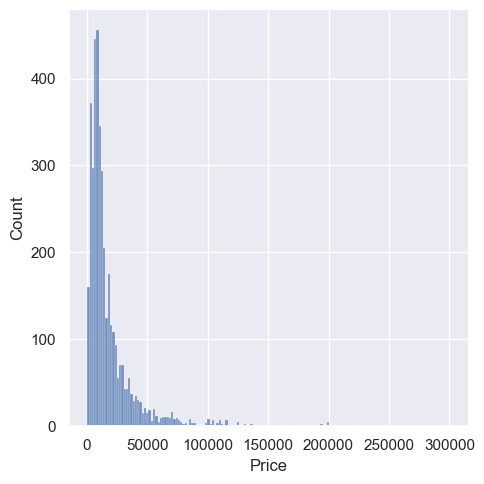

In [31]:
sns.displot(df['Price'])

Looks pretty exponential to me. Not surprising, really.

In [32]:
q = df['Price'].quantile(.99)
q

129812.51999999981

In [33]:
df_pout = df[df['Price']<q]
df_pout.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


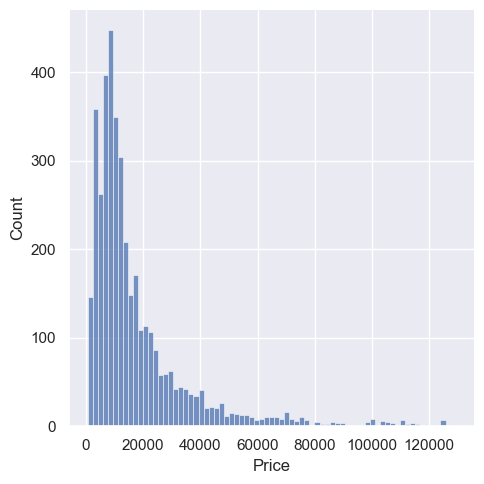

In [34]:
sns.displot(df_pout['Price'])

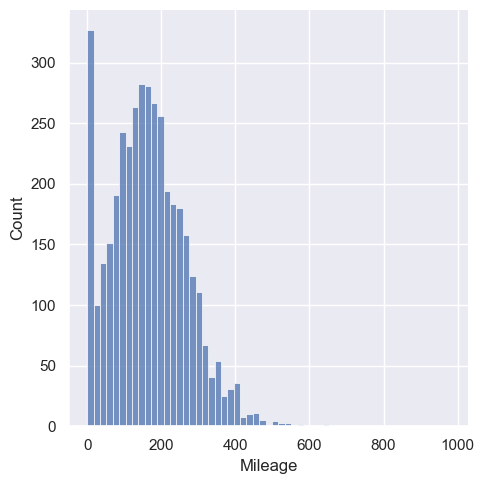

In [35]:
sns.displot(df_pout['Mileage'])

In [36]:
q = df['Mileage'].quantile(.99)
df_mout = df_pout[df_pout['Mileage']<q]
df_mout.describe()

,Price,Mileage,EngineV,Year
count,3943.000000,3943.000000,3943.000000,3943.000000
mean,17936.780614,161.414659,2.747497,2006.393102
std,19009.750360,95.940408,4.981033,6.593870
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21417.500000,230.000000,3.000000,2011.000000
max,129222.000000,433.000000,99.990000,2016.000000


In [37]:
df_mout.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


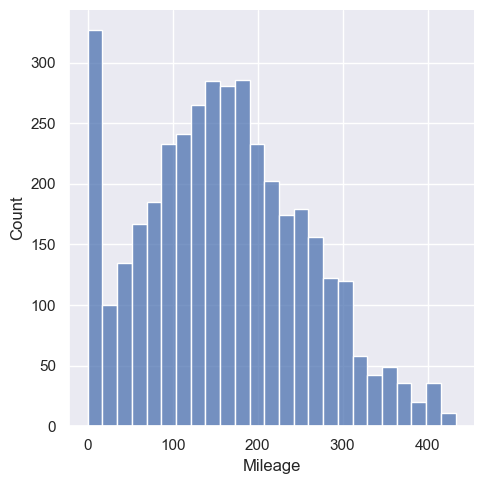

In [38]:
sns.displot(df_mout['Mileage'])

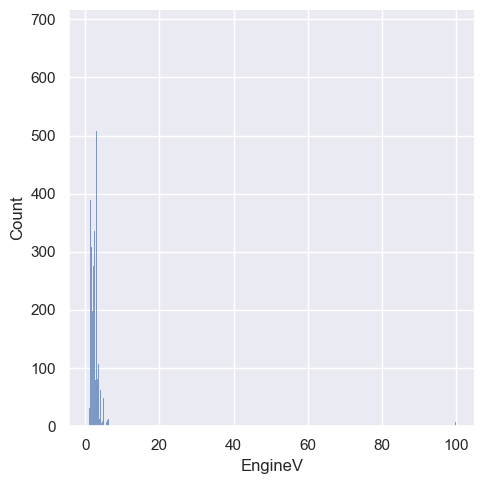

In [39]:
sns.displot(df_mout['EngineV'])

In [40]:
EngV = pd.DataFrame(df_mout['EngineV'])
EngV.sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
2214,1.00
2196,1.00
1923,1.00
...,...
2349,99.99
256,99.99
1311,99.99
3641,99.99


In [41]:
df_vout = df_mout[df_mout['EngineV']<=6.5]

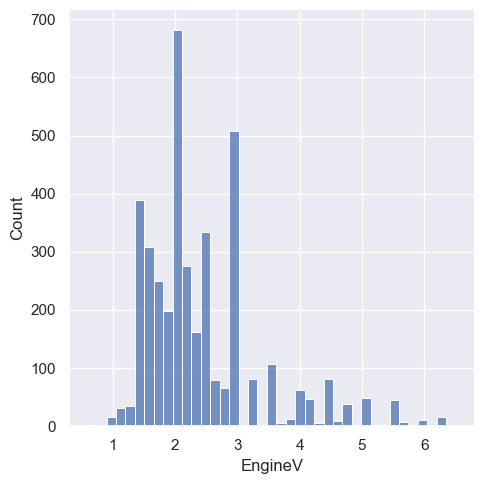

In [42]:
sns.displot(df_vout['EngineV'])

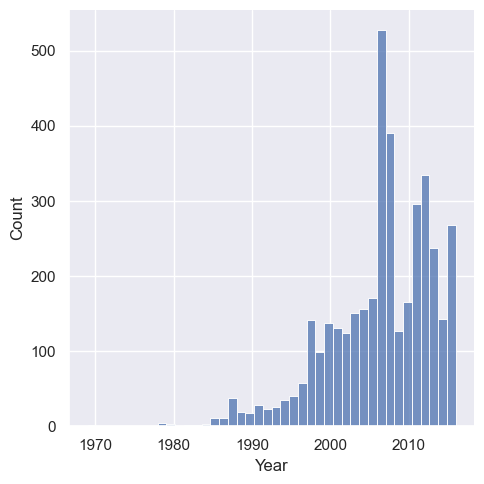

In [43]:
sns.displot(df_vout['Year'])

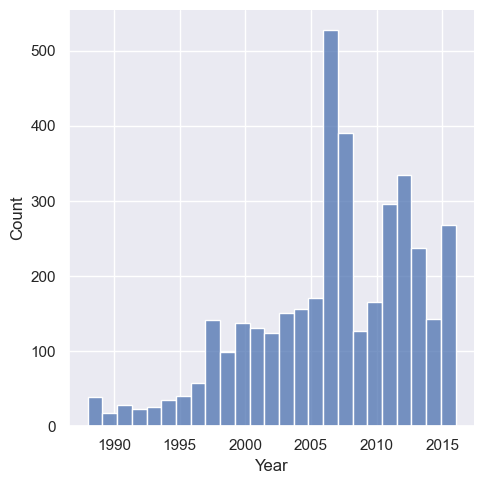

In [44]:
q = df_vout['Year'].quantile(0.01)
df_yout = df_vout[df_vout['Year']>q]
sns.displot(df_yout['Year'])

In [45]:
df_clean = df_yout.reset_index(drop=True)
df_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18201.955032,NaN,160.471425,2.451293,NaN,NaN,2006.713473
std,NaN,19086.956320,NaN,95.531340,0.951521,NaN,NaN,6.100481
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [46]:
df = df_clean.copy()

In [47]:
df['Price'].max()

129222.0

In [48]:
q = df['Price'].quantile(.99)
df_pout = df[df['Price']<q]

In [49]:
df_pout['Price'].max()

103999.0

In [50]:
df_clean = df_pout.reset_index(drop=True)
df_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3828,3828.000000,3828,3828.000000,3828.000000,3828,3828,3828.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1454,NaN,NaN,1774,3466,NaN
mean,NaN,17224.326570,NaN,162.009666,2.443715,NaN,NaN,2006.624347
std,NaN,16513.347692,NaN,94.776158,0.951077,NaN,NaN,6.066348
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,94.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21000.000000,NaN,227.000000,3.000000,NaN,NaN,2011.000000


Good job I checked that!

In [51]:
df = df_clean.copy()

#### Checking OLS Assumptions

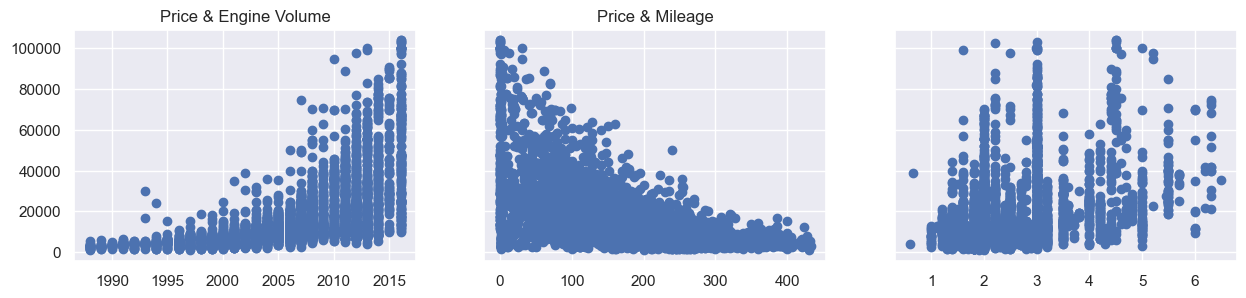

In [52]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(15,3))
ax1.scatter(df['Year'],df['Price'])
ax1.set_title('Price & Year')
ax2.scatter(df['Mileage'],df['Price'])
ax2.set_title('Price & Mileage')
ax3.scatter(df['EngineV'],df['Price'])
ax1.set_title('Price & Engine Volume')

plt.show()

In [53]:
log_price = np.log(df['Price'])
df['log_price'] = log_price
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


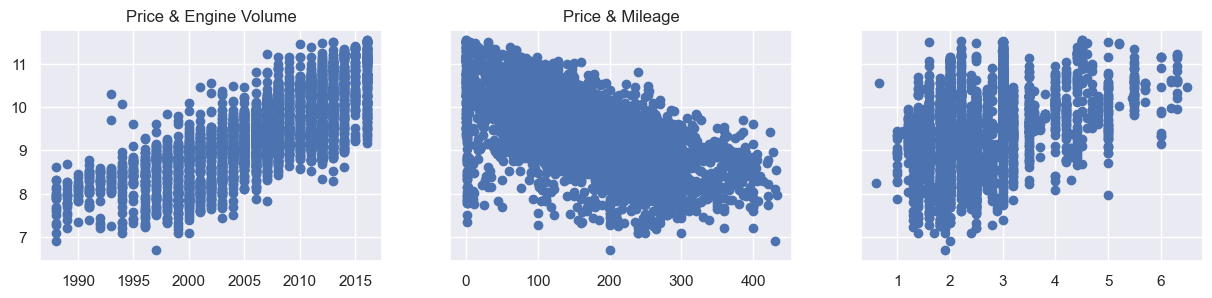

In [54]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(15,3))
ax1.scatter(df['Year'],df['log_price'])
ax1.set_title('Price & Year')
ax2.scatter(df['Mileage'],df['log_price'])
ax2.set_title('Price & Mileage')
ax3.scatter(df['EngineV'],df['log_price'])
ax1.set_title('Price & Engine Volume')

plt.show()

In [55]:
df_drop_price = df.copy()
df_log = df.drop(columns='Price')
df_log

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3823,Renault,sedan,152,1.6,Petrol,yes,2007,8.824678
3824,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3825,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3826,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [56]:
df = df_log.copy()

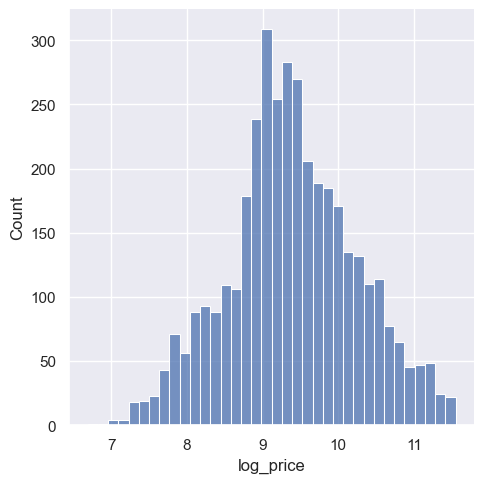

In [57]:
sns.displot(df['log_price'])

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,3.896303,Mileage
1,10.295366,Year
2,7.603626,EngineV


In [59]:
data_no_multicol = df.drop(columns='Year')
df = data_no_multicol.copy()
df.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


#### Dummy Vars

In [60]:
with_dum = pd.get_dummies(df, columns=['Brand', 'Body', 'Engine Type', 'Registration'], drop_first=True).astype(int)
with_dum.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2,8,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2,8,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5,9,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2,9,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [61]:
with_dum['log_price']

0        8
1        8
2        9
3       10
4        9
        ..
3823     8
3824     9
3825     9
3826     8
3827     9
Name: log_price, Length: 3828, dtype: int32

In [62]:
numeric = df.select_dtypes(include=['float64', 'int64'])
categorical = df.select_dtypes(include=['object', 'category'])

In [63]:
with_dums = pd.concat([numeric, pd.get_dummies(categorical, drop_first=True).astype(int)], axis=1)

In [64]:
with_dums.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [65]:
df = with_dums.copy()

#### VIF Recheck

In [66]:
df.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['Mileage','EngineV','Brand_BMW','Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,4.576461,Mileage
1,7.772461,EngineV
2,2.287728,Brand_BMW
3,2.813739,Brand_Mercedes-Benz
4,1.643126,Brand_Mitsubishi
5,2.091408,Brand_Renault
6,2.163260,Brand_Toyota
7,2.852820,Brand_Volkswagen
8,1.469528,Body_hatch
9,1.545478,Body_other


In [68]:
df['Registration_yes'].sum()

3466

May have to drop this column as the vast majorirty are yes, leaving insufficient data to make any accurate prediction

In [69]:
df.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [70]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
df = df[cols]
df.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [71]:
targets = df['log_price']
inputs = df.drop(['log_price'], axis=1)

#### Scaling

In [72]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [73]:
scaled_inputs = scaler.transform(inputs)

### Train/Test Split

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size = 0.2, random_state=365)

#### Regression

In [76]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [77]:
y_hat = reg.predict(x_train)

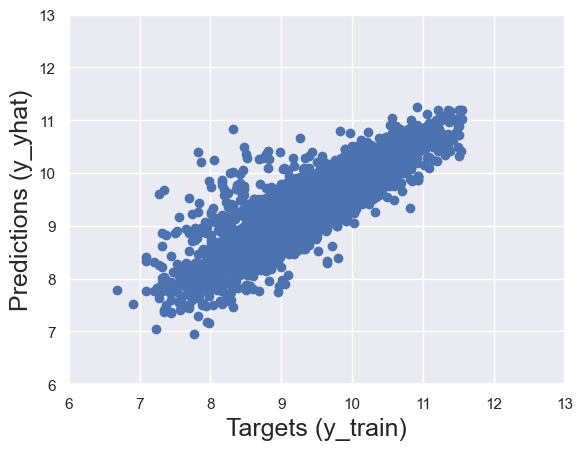

In [80]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_yhat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

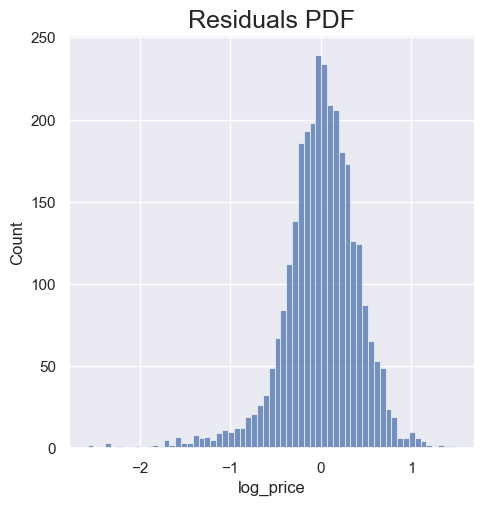

In [81]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [82]:
reg.score(x_train, y_train)

0.7464244490465355

### Weights & Bias

In [83]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.440726
1,EngineV,0.216995
2,Brand_BMW,0.009151
3,Brand_Mercedes-Benz,-0.003634
4,Brand_Mitsubishi,-0.138998
5,Brand_Renault,-0.177959
6,Brand_Toyota,-0.061356
7,Brand_Volkswagen,-0.089598
8,Body_hatch,-0.139116
9,Body_other,-0.093412


#### Benchmarks

In [92]:
df_clean.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [94]:
df_clean['Brand'].unique() #Audi

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [95]:
df_clean['Body'].unique() #Crossover

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [97]:
#Type was Diesel, Reg, no

benchmarks = {'Brand' :'Audi','Body':'crossover','Engine Type':'Diesel','Registration':'no'}

#### Testing

In [100]:
y_hat_test = reg.predict(x_test)

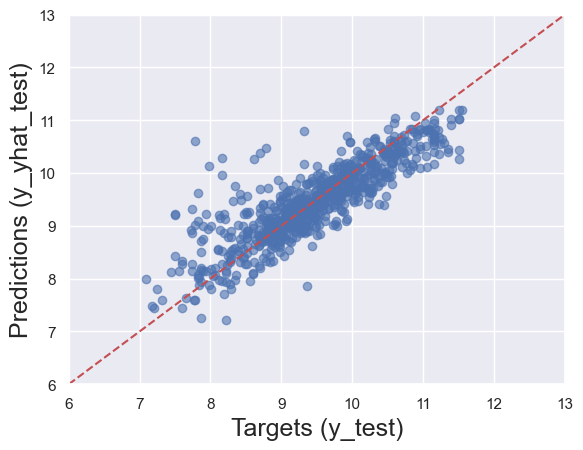

In [109]:
plt.scatter(y_test, y_hat_test, alpha=.6)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_yhat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.plot([6, 13], [6, 13], 'r--')
plt.show()

In [110]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

,Predictions
0,8871.130094
1,17586.749221
2,8044.242964
3,10177.150971
4,2714.577576


In [112]:
y_test_ind = y_test.reset_index(drop=True)
y_test_ind.head()

0     9.769956
1    10.146434
2     9.259131
3     8.476371
4     8.268732
Name: log_price, dtype: float64

In [114]:
df_pf['Target'] = np.exp(y_test_ind)
df_pf

,Predictions,Target
0,8871.130094,17500.0
1,17586.749221,25500.0
2,8044.242964,10500.0
3,10177.150971,4800.0
4,2714.577576,3900.0
...,...,...
761,38021.987779,75555.0
762,15432.939506,28000.0
763,12123.956352,14500.0
764,26192.063277,11200.0


In [116]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
df_pf

,Predictions,Target,Residual
0,8871.130094,17500.0,8628.869906
1,17586.749221,25500.0,7913.250779
2,8044.242964,10500.0,2455.757036
3,10177.150971,4800.0,-5377.150971
4,2714.577576,3900.0,1185.422424
...,...,...,...
761,38021.987779,75555.0,37533.012221
762,15432.939506,28000.0,12567.060494
763,12123.956352,14500.0,2376.043648
764,26192.063277,11200.0,-14992.063277


In [117]:
df_pf['Residual%'] = np.absolute(df_pf['Residual']/df_pf['Target'] * 100)
df_pf

,Predictions,Target,Residual,Residual%
0,8871.130094,17500.0,8628.869906,49.307828
1,17586.749221,25500.0,7913.250779,31.032356
2,8044.242964,10500.0,2455.757036,23.388162
3,10177.150971,4800.0,-5377.150971,112.023979
4,2714.577576,3900.0,1185.422424,30.395447
...,...,...,...,...
761,38021.987779,75555.0,37533.012221,49.676411
762,15432.939506,28000.0,12567.060494,44.882359
763,12123.956352,14500.0,2376.043648,16.386508
764,26192.063277,11200.0,-14992.063277,133.857708


In [118]:
df_pf.describe()

,Predictions,Target,Residual,Residual%
count,766.000000,766.000000,766.000000,766.000000
mean,16526.066219,18686.853486,2160.787267,40.062921
std,12529.915384,17972.420761,9841.813348,88.484535
min,1358.676693,1200.000000,-38340.533788,0.012484
25%,8028.093733,7300.000000,-1827.520936,9.920247
50%,12467.260168,12399.500000,365.563535,22.372513
75%,21477.862853,23150.000000,3643.438681,39.151277
max,72541.954595,103999.000000,70447.350641,1597.522241


In [119]:
pd.options.display.max_rows = 999
df_pf.sort_values(by=['Residual%'])

,Predictions,Target,Residual,Residual%
695,24303.033675,24300.00,-3.033675,0.012484
85,45514.384425,45500.00,-14.384425,0.031614
540,14505.419272,14500.00,-5.419272,0.037374
508,6195.747057,6200.00,4.252943,0.068596
352,10792.082837,10800.00,7.917163,0.073307
729,17478.847751,17500.00,21.152249,0.120870
264,11480.328741,11500.00,19.671259,0.171054
530,24453.795629,24500.00,46.204371,0.188589
249,39916.836471,39999.00,82.163529,0.205414
265,39916.836471,39999.00,82.163529,0.205414


In [120]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


#### Conclusion

A lot of the more egregious percentage Residuals are on the very low end of prices, and the actual Residuals are all negative. Perhaps these cars are damaged in some way, which may push their price lower down than the model accounts for.

#### Improvement

Will check an f-regression with year as, despite the high VIF, it may well have a lot of explanatory power.